<a href="https://colab.research.google.com/github/saima8/Burger-Bari/blob/main/(Saima_Khan)Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is based on data management for the Alzheimer’s Disease Neuroimaging Initiative (ADNI) database (adni.loni.usc.edu). Diffusion tensor imaging (DTI), which gives the information of the subtle microstructure changes of white matter integrity and provides as a more sensitive version of MRI imaging being a biomarker for Alzheimer disease (AD).  DTI Data of white matter regions of interest (ROI) are collected from ADNI-2 and ADNI-3 project (see www.adni.org). DTI data were generated from the Laboratory of NeuroImaging, UCLA (Nir et al., 2013; link at adni.org).  

After clearing, there 177 individuals with DTI variables (228 continuous DTI variables), all are White. 

(1) Outcome variable 1 (Column J): Diagnosis - AD123 [1 = Cognitive normal (CN, n=33), 2= Alzheimer disease (AD, n=36), 3 = mild cognitive impairment (MCI, n=108)]. 

(2) Outcome variable 2 (Column F): Preclinical AD using AB42 – ABETA12 [ 1= non-preclinical AD, n=122; 2= preclinical AD, n=77, 999999=missing, n=18]. 

(3) Outcome variable 3 (Column R) : Preclinical AD using AV - AV45AB12 [ 0= non-preclinical AD, n=76; 1= preclinical AD, n=98; 999999= missing, n=3). 

The research question is if the 228 DTI variables (columns AM to JF) can predict AD diagnosis and preclinical AD using machine learning. 

Other variables may include age, education years, gender01 (0=male, 1=female), AOPE4 (0=no APOE4 allele, 1= 1 AOPE4 allele, 2= 2 AOPE4 alleles), APOE4B (0=no AOPE4 allele, 1= at least 1 APOE4 allele). 

Other variables: Tau80 (Tau protein), Ptau (Ptau protein), MRI variables ( )

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv("/content/ADNI_Dataset.csv")
print(df.shape)
df.head()

(177, 266)


,RID,VISCODE,Gender01,Marry123,ABETA1700,ABETA12,TAU80,PTAU8,ADMCI3,AD123,AGE,EDU,PTRACCAT,APOE4,APOE4B,FDG,AV45,AV45AB12,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOT,TRAB,FAQ,MOCA,Ventricles,Hippocampus,WholeBrain,EntorhiNaNl,Fusiform,MidTemp,ICV,AD_CST_L,AD_CST_R,...,RD_ACR_R,RD_SCR_L,RD_SCR_R,RD_PCR_L,RD_PCR_R,RD_CGC_L,RD_CGC_R,RD_CGH_L,RD_CGH_R,RD_FX_ST_L,RD_FX_ST_R,RD_SLF_L,RD_SLF_R,RD_SFO_L,RD_SFO_R,RD_IFO_L,RD_IFO_R,RD_SS_L,RD_SS_R,RD_EC_L,RD_EC_R,RD_UNC_L,RD_UNC_R,RD_FX_L,RD_FX_R,RD_GCC_L,RD_GCC_R,RD_BCC_L,RD_BCC_R,RD_SCC_L,RD_SCC_R,RD_RLIC_L,RD_RLIC_R,RD_TAP_L,RD_TAP_R,RD_SUMGCC,RD_SUMBCC,RD_SUMSCC,RD_SUMCC,RD_SUMFX
0,4018,bl,0,1.0,1700.0,1.0,238.6,22.26,CN,1,76.1,18,White,0.0,0.0,1.394259,0.906918,0.0,0.0,9.0,16.0,6.0,29,38,5,6,60.000000,11,110.0,0.0,24.0,33175.0,7843.0,1.056436e+06,3580.0,17237.0,21861.0,1534348.907,0.001350,0.001328,...,0.000773,0.000664,0.000665,0.000665,0.000674,0.000739,0.000753,0.000792,0.000753,0.001020,0.001013,0.000667,0.000660,0.001021,0.000804,0.000824,0.000765,0.000765,0.000783,0.000764,0.000724,0.000694,0.000779,0.002539,0.001995,0.000786,0.000835,0.001030,0.001085,0.000755,0.000703,0.000663,0.000660,0.001371,0.001323,0.000811,0.001060,0.000728,0.000858,0.002141
1,4119,bl,0,1.0,1700.0,1.0,305.6,30.31,CN,1,79.3,20,White,0.0,0.0,1.320801,1.003596,0.0,0.0,10.0,12.0,2.0,30,33,3,6,75.000000,13,36.0,0.0,27.0,38806.0,7274.0,1.115135e+06,4204.0,22128.0,21497.0,1546641.936,0.001256,0.001210,...,0.000780,0.000640,0.000635,0.000608,0.000613,0.000736,0.000712,0.000767,0.000775,0.000940,0.001023,0.000569,0.000538,0.001452,0.001005,0.000696,0.000718,0.000727,0.000671,0.000688,0.000652,0.000679,0.000735,0.002316,0.001934,0.000876,0.000827,0.000939,0.001081,0.000751,0.000702,0.000597,0.000587,0.001430,0.001414,0.000852,0.001014,0.000725,0.000853,0.002090
2,4121,bl,0,2.0,1345.0,1.0,304.8,26.15,CN,1,89.0,16,White,0.0,0.0,1.095051,0.949293,0.0,0.0,5.0,9.0,4.0,27,31,3,3,42.857143,9,117.0,0.0,19.0,32628.0,6456.0,9.610572e+05,4113.0,19714.0,18757.0,1382468.977,0.001457,0.001468,...,0.000731,0.000689,0.000717,0.000704,0.000761,0.000822,0.000970,0.000931,0.000893,0.001459,0.001461,0.000655,0.000636,0.000791,0.000783,0.000781,0.000772,0.000745,0.000826,0.000796,0.000753,0.001021,0.001234,0.002337,0.002174,0.000859,0.000875,0.001122,0.001151,0.000818,0.000762,0.000676,0.000740,0.001615,0.001260,0.000868,0.001138,0.000790,0.000922,0.002227
3,4148,bl,0,1.0,1352.0,1.0,186.7,15.01,CN,1,73.0,18,White,0.0,0.0,1.310309,1.012772,0.0,0.0,4.0,6.0,2.0,30,49,5,3,25.000000,10,40.0,0.0,25.0,14152.0,8695.0,1.124853e+06,4443.0,22278.0,21521.0,1562059.325,0.001152,0.001116,...,0.000637,0.000595,0.000586,0.000634,0.000645,0.000681,0.000687,0.000895,0.000746,0.000865,0.000864,0.000587,0.000574,0.000618,0.000620,0.000716,0.000710,0.000648,0.000670,0.000724,0.000668,0.000960,0.000767,0.001455,0.001457,0.000711,0.000732,0.000752,0.000852,0.000616,0.000609,0.000625,0.000594,0.000993,0.000833,0.000722,0.000809,0.000612,0.000701,0.001456
4,4254,bl,1,2.0,1194.0,1.0,377.5,31.96,CN,1,85.9,12,White,0.0,0.0,1.175914,1.030933,0.0,0.0,6.0,9.0,2.0,26,35,5,2,22.222222,13,94.0,0.0,23.0,NaN,6217.0,8.769380e+05,NaN,NaN,NaN,1258818.706,0.001768,0.001657,...,0.000870,0.000764,0.000775,0.000716,0.000687,0.000778,0.000770,0.000865,0.001298,0.001146,0.001190,0.000701,0.000635,0.001246,0.001136,0.000760,0.000761,0.000758,0.000816,0.000908,0.000867,0.000878,0.001198,0.002129,0.001866,0.000920,0.000982,0.001069,0.001123,0.000843,0.000763,0.000725,0.000643,0.001475,0.001097,0.000952,0.001095,0.000801,0.000930,0.001981


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 266 entries, RID to RD_SUMFX
dtypes: float64(254), int64(9), object(3)
memory usage: 368.0+ KB


In [ ]:
df.columns

Index(['RID', 'VISCODE', 'Gender01', 'Marry123', 'ABETA1700', 'ABETA12',
       'TAU80', 'PTAU8', 'ADMCI3', 'AD123',
       ...
       'RD_SCC_R', 'RD_RLIC_L', 'RD_RLIC_R', 'RD_TAP_L', 'RD_TAP_R',
       'RD_SUMGCC', 'RD_SUMBCC', 'RD_SUMSCC', 'RD_SUMCC', 'RD_SUMFX'],
      dtype='object', length=266)

In [ ]:
#Check if there is any duplicate row - found no duplicate row
duplicate=df[df.duplicated()]
print("Total duplicate values:")
len(duplicate)

Total duplicate values:


0

In [ ]:
print("Total null values found : ",df.isnull().sum().sum())

Total null values found :  249


In [ ]:
df.isnull().sum().head(30)

RID                       0
VISCODE                   0
Gender01                  0
Marry123                  2
ABETA1700                18
ABETA12                  18
TAU80                    18
PTAU8                    18
ADMCI3                    0
AD123                     0
AGE                       0
EDU                       0
PTRACCAT                  0
APOE4                     3
APOE4B                    3
FDG                       4
AV45                      3
AV45AB12                  3
CDRSB                     0
ADAS11                    1
ADAS13                    2
ADASQ4                    1
MMSE                      0
RAVLT_immediate           0
RAVLT_learning            0
RAVLT_forgetting          0
RAVLT_perc_forgetting     1
LDELTOT                   0
TRAB                      2
FAQ                       2
dtype: int64

In [ ]:
null_cols = (df.isnull().sum() / len(df)).sort_values(ascending=False)[:20]
null_cols

Fusiform       0.186441
MidTemp        0.186441
EntorhiNaNl    0.186441
Hippocampus    0.118644
Ventricles     0.101695
ABETA1700      0.101695
ABETA12        0.101695
TAU80          0.101695
PTAU8          0.101695
WholeBrain     0.045198
MOCA           0.022599
FDG            0.022599
APOE4B         0.016949
AV45AB12       0.016949
AV45           0.016949
APOE4          0.016949
Marry123       0.011299
ADAS13         0.011299
FAQ            0.011299
TRAB           0.011299
dtype: float64

In [ ]:
null_cols = null_cols[null_cols > 0.17].index
null_cols

Index(['Fusiform', 'MidTemp', 'EntorhiNaNl'], dtype='object')

In [ ]:
# drop the column from the dataset which have most null value
df=df.drop(columns=['Fusiform', 'MidTemp', 'EntorhiNaNl'])

In [ ]:
# Used drop() function for removing unnecessary features
df = df.drop(['RID','VISCODE'], axis = 'columns', inplace = False)

In [ ]:
df.shape

(177, 261)

In [ ]:
df =df.replace(999999,np.nan)
df

,Gender01,Marry123,ABETA1700,ABETA12,TAU80,PTAU8,ADMCI3,AD123,AGE,EDU,PTRACCAT,APOE4,APOE4B,FDG,AV45,AV45AB12,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOT,TRAB,FAQ,MOCA,Ventricles,Hippocampus,WholeBrain,ICV,AD_CST_L,AD_CST_R,AD_ICP_L,AD_ICP_R,AD_ML_L,AD_ML_R,AD_SCP_L,...,RD_ACR_R,RD_SCR_L,RD_SCR_R,RD_PCR_L,RD_PCR_R,RD_CGC_L,RD_CGC_R,RD_CGH_L,RD_CGH_R,RD_FX_ST_L,RD_FX_ST_R,RD_SLF_L,RD_SLF_R,RD_SFO_L,RD_SFO_R,RD_IFO_L,RD_IFO_R,RD_SS_L,RD_SS_R,RD_EC_L,RD_EC_R,RD_UNC_L,RD_UNC_R,RD_FX_L,RD_FX_R,RD_GCC_L,RD_GCC_R,RD_BCC_L,RD_BCC_R,RD_SCC_L,RD_SCC_R,RD_RLIC_L,RD_RLIC_R,RD_TAP_L,RD_TAP_R,RD_SUMGCC,RD_SUMBCC,RD_SUMSCC,RD_SUMCC,RD_SUMFX
0,0,1.0,1700.0,1.0,238.6,22.26,CN,1,76.1,18,White,0.0,0.0,1.394259,0.906918,0.0,0.0,9.0,16.0,6.0,29,38,5,6,60.000000,11,110.0,0.0,24.0,33175.0,7843.0,1.056436e+06,1534348.907,0.001350,0.001328,0.001565,0.001412,0.001261,0.001233,0.001688,...,0.000773,0.000664,0.000665,0.000665,0.000674,0.000739,0.000753,0.000792,0.000753,0.001020,0.001013,0.000667,0.000660,0.001021,0.000804,0.000824,0.000765,0.000765,0.000783,0.000764,0.000724,0.000694,0.000779,0.002539,0.001995,0.000786,0.000835,0.001030,0.001085,0.000755,0.000703,0.000663,0.000660,0.001371,0.001323,0.000811,0.001060,0.000728,0.000858,0.002141
1,0,1.0,1700.0,1.0,305.6,30.31,CN,1,79.3,20,White,0.0,0.0,1.320801,1.003596,0.0,0.0,10.0,12.0,2.0,30,33,3,6,75.000000,13,36.0,0.0,27.0,38806.0,7274.0,1.115135e+06,1546641.936,0.001256,0.001210,0.001742,0.001475,0.001256,0.001191,0.001557,...,0.000780,0.000640,0.000635,0.000608,0.000613,0.000736,0.000712,0.000767,0.000775,0.000940,0.001023,0.000569,0.000538,0.001452,0.001005,0.000696,0.000718,0.000727,0.000671,0.000688,0.000652,0.000679,0.000735,0.002316,0.001934,0.000876,0.000827,0.000939,0.001081,0.000751,0.000702,0.000597,0.000587,0.001430,0.001414,0.000852,0.001014,0.000725,0.000853,0.002090
2,0,2.0,1345.0,1.0,304.8,26.15,CN,1,89.0,16,White,0.0,0.0,1.095051,0.949293,0.0,0.0,5.0,9.0,4.0,27,31,3,3,42.857143,9,117.0,0.0,19.0,32628.0,6456.0,9.610572e+05,1382468.977,0.001457,0.001468,0.001545,0.001721,0.001378,0.001273,0.001574,...,0.000731,0.000689,0.000717,0.000704,0.000761,0.000822,0.000970,0.000931,0.000893,0.001459,0.001461,0.000655,0.000636,0.000791,0.000783,0.000781,0.000772,0.000745,0.000826,0.000796,0.000753,0.001021,0.001234,0.002337,0.002174,0.000859,0.000875,0.001122,0.001151,0.000818,0.000762,0.000676,0.000740,0.001615,0.001260,0.000868,0.001138,0.000790,0.000922,0.002227
3,0,1.0,1352.0,1.0,186.7,15.01,CN,1,73.0,18,White,0.0,0.0,1.310309,1.012772,0.0,0.0,4.0,6.0,2.0,30,49,5,3,25.000000,10,40.0,0.0,25.0,14152.0,8695.0,1.124853e+06,1562059.325,0.001152,0.001116,0.001294,0.001545,0.001204,0.001218,0.001600,...,0.000637,0.000595,0.000586,0.000634,0.000645,0.000681,0.000687,0.000895,0.000746,0.000865,0.000864,0.000587,0.000574,0.000618,0.000620,0.000716,0.000710,0.000648,0.000670,0.000724,0.000668,0.000960,0.000767,0.001455,0.001457,0.000711,0.000732,0.000752,0.000852,0.000616,0.000609,0.000625,0.000594,0.000993,0.000833,0.000722,0.000809,0.000612,0.000701,0.001456
4,1,2.0,1194.0,1.0,377.5,31.96,CN,1,85.9,12,White,0.0,0.0,1.175914,1.030933,0.0,0.0,6.0,9.0,2.0,26,35,5,2,22.222222,13,94.0,0.0,23.0,NaN,6217.0,8.769380e+05,1258818.706,0.001768,0.001657,0.001818,0.001603,0.001575,0.001338,0.001907,...,0.000870,0.000764,0.000775,0.000716,0.000687,0.000778,0.000770,0.000865,0.001298,0.001146,0.001190,0.000701,0.000635,0.001246,0.001136,0.000760,0.000761,0.000758,0.000816,0.000908,0.000867,0.000878,0.001198,0.002129,0.001866,0.000920,0.000982,0.001069,0.001123,0.000843,0.000763,0.000725,0.000643,0.001475,0.001097,0.000952,0.001095,0.000801,0.000930,0.001981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
df= df.drop(['FDG', 'AV45', 'AV45AB12', 'CDRSB', 'ADAS11', 'ADAS13',
       'ADASQ4', 'MMSE', 'RAVLT_immediate', 'RAVLT_learning',
       'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'LDELTOT', 'TRAB', 'FAQ',
       'MOCA', 'Ventricles', 'Hippocampus', 'WholeBrain', 'ICV'], axis = 1)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(157, 241)

In [ ]:
num_cols = df._get_numeric_data().columns
num_cols

Index(['Gender01', 'Marry123', 'ABETA1700', 'ABETA12', 'TAU80', 'PTAU8',
       'AD123', 'AGE', 'EDU', 'APOE4',
       ...
       'RD_SCC_R', 'RD_RLIC_L', 'RD_RLIC_R', 'RD_TAP_L', 'RD_TAP_R',
       'RD_SUMGCC', 'RD_SUMBCC', 'RD_SUMSCC', 'RD_SUMCC', 'RD_SUMFX'],
      dtype='object', length=239)

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.preprocessing import MinMaxScaler
feature_scale=[feature for feature in df.columns]
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [ ]:
x= df.drop(['ABETA12'], axis = 1)
y = df['ABETA12']
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
161    2.0
162    2.0
163    2.0
164    2.0
165    2.0
Name: ABETA12, Length: 157, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

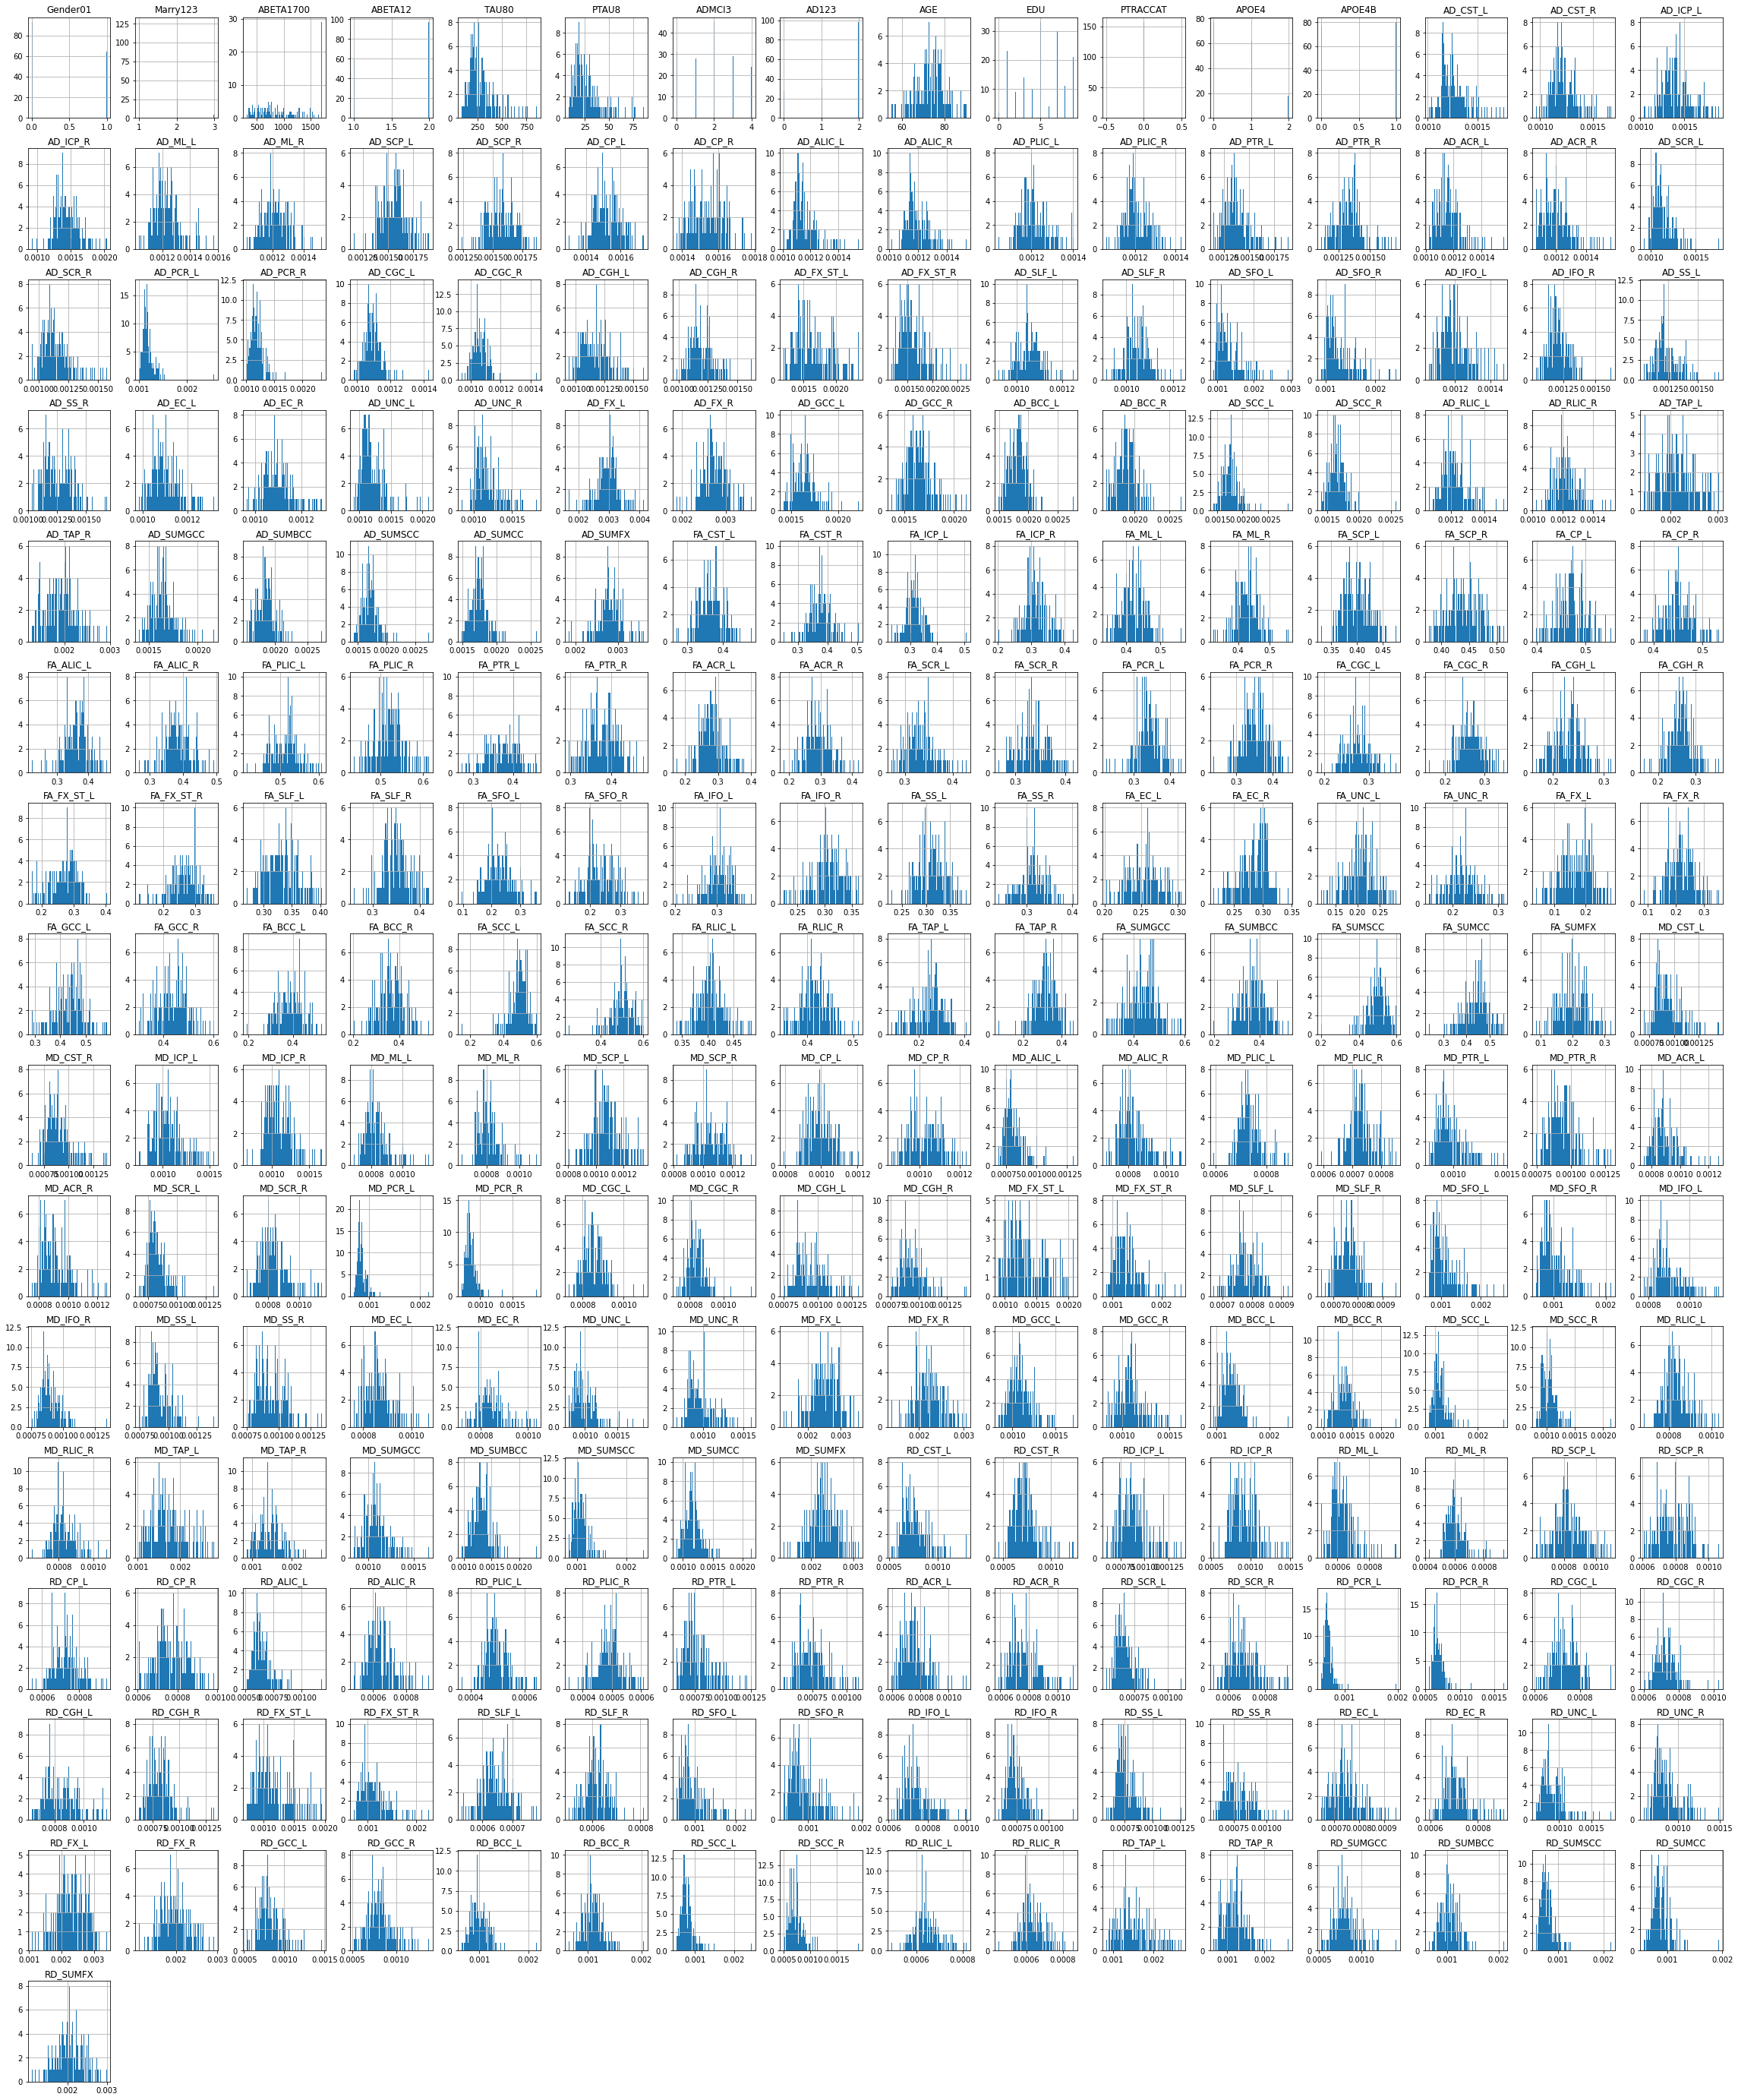

In [ ]:
df.hist(figsize=(40, 50), bins=100, xlabelsize=10, ylabelsize=10);

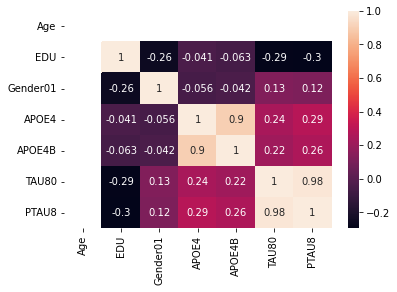

In [ ]:
cat_cols = pd.DataFrame(df,columns=['Age','EDU','Gender01','APOE4','APOE4B','TAU80','PTAU8'])
corrMatrix = cat_cols.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
for var in cat_cols:
    print('\nDistribution of', var)
    
    print(cat_cols[var].value_counts())


Distribution of Age
Series([], Name: Age, dtype: int64)

Distribution of EDU
5    33
7    30
1    23
9    21
3    14
8    11
4    10
2     9
6     4
0     2
Name: EDU, dtype: int64

Distribution of Gender01
0    93
1    64
Name: Gender01, dtype: int64

Distribution of APOE4
0.0    77
1.0    62
2.0    18
Name: APOE4, dtype: int64

Distribution of APOE4B
1.0    80
0.0    77
Name: APOE4B, dtype: int64

Distribution of TAU80
234.0    2
415.1    2
313.8    2
267.1    2
202.6    2
        ..
294.6    1
536.3    1
326.9    1
190.9    1
377.5    1
Name: TAU80, Length: 152, dtype: int64

Distribution of PTAU8
18.42    2
12.73    2
17.63    2
16.13    2
59.81    1
        ..
56.81    1
48.31    1
17.04    1
16.28    1
14.00    1
Name: PTAU8, Length: 153, dtype: int64


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Age, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


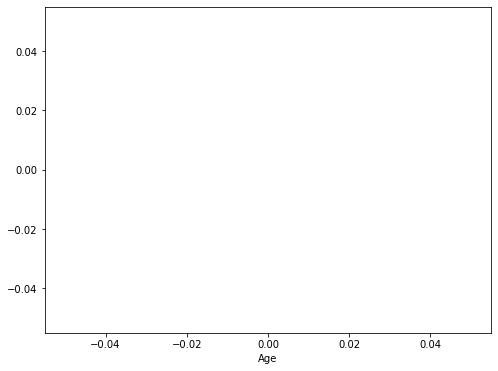

In [ ]:
print(cat_cols['Age'].describe())
plt.figure(figsize=(8, 6))
sns.distplot(cat_cols['Age'], color='red', bins=100, hist_kws={'alpha': 0.3});

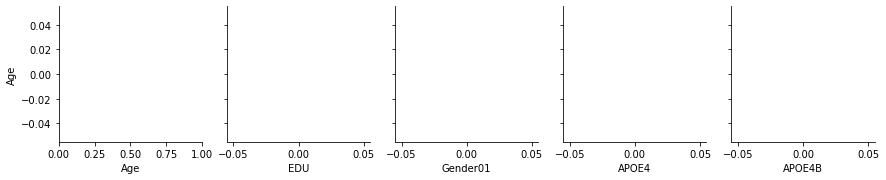

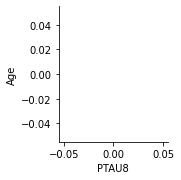

In [ ]:
for i in range(0, len(cat_cols.columns), 6):
    sns.pairplot(data=cat_cols,
                x_vars=cat_cols.columns[i:i+5],
                y_vars=['Age'])

count    157.000000
mean       5.089172
std        2.682746
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max        9.000000
Name: EDU, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


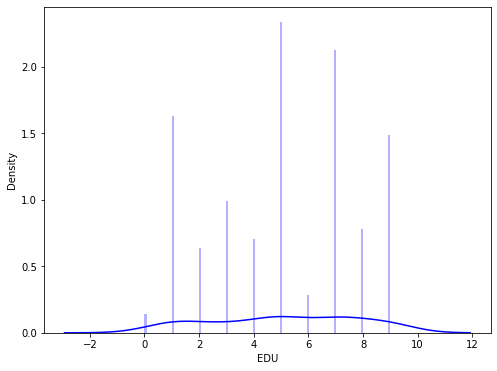

In [ ]:
print(cat_cols['EDU'].describe())
plt.figure(figsize=(8, 6))
sns.distplot(cat_cols['EDU'], color='blue', bins=100, hist_kws={'alpha': 0.3});

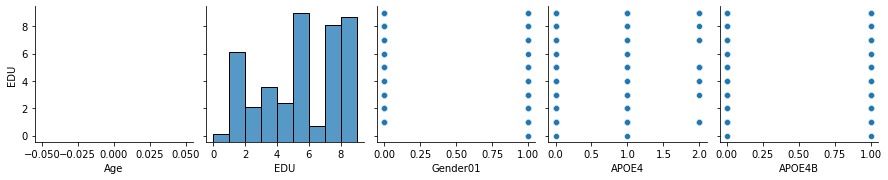

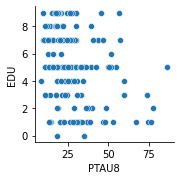

In [ ]:
for i in range(0, len(cat_cols.columns), 6):
    sns.pairplot(data=cat_cols,
                x_vars=cat_cols.columns[i:i+5],
                y_vars=['EDU'])

count    157.000000
mean       0.407643
std        0.492969
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Gender01, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


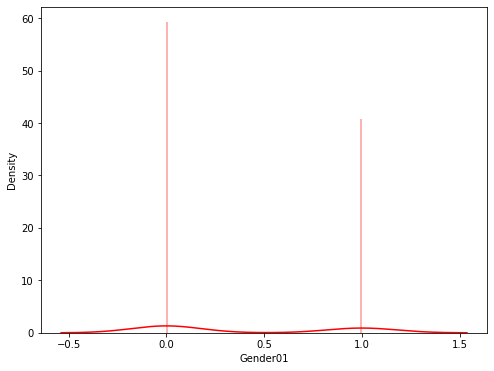

In [ ]:
print(cat_cols['Gender01'].describe())
plt.figure(figsize=(8, 6))
sns.distplot(cat_cols['Gender01'], color='red', bins=100, hist_kws={'alpha': 0.3});

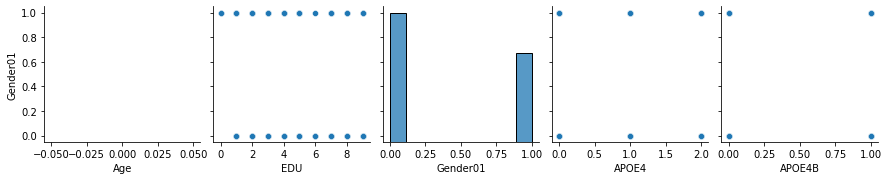

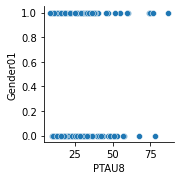

In [ ]:
for i in range(0, len(cat_cols.columns), 6):
    sns.pairplot(data=cat_cols,
                x_vars=cat_cols.columns[i:i+5],
                y_vars=['Gender01'])

count    157.000000
mean       0.624204
std        0.683262
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: APOE4, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


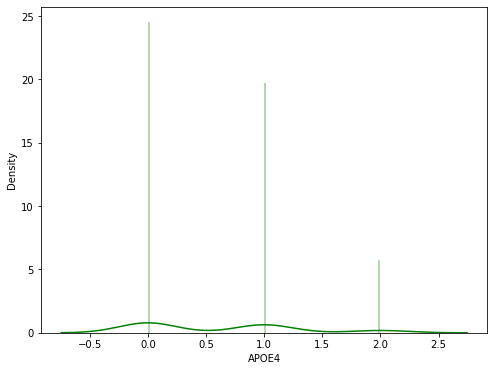

In [ ]:
print(cat_cols['APOE4'].describe())
plt.figure(figsize=(8, 6))
sns.distplot(cat_cols['APOE4'], color='g', bins=100, hist_kws={'alpha': 0.3});

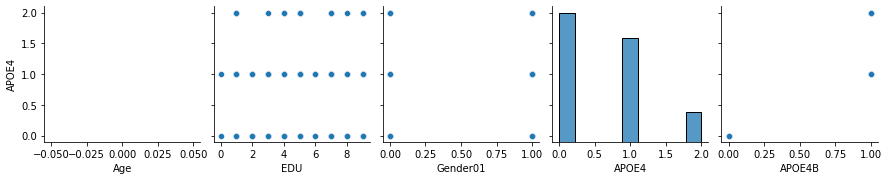

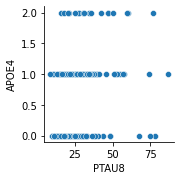

In [ ]:
for i in range(0, len(cat_cols.columns), 6):
    sns.pairplot(data=cat_cols,
                x_vars=cat_cols.columns[i:i+5],
                y_vars=['APOE4'])

count    157.000000
mean       0.509554
std        0.501508
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: APOE4B, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


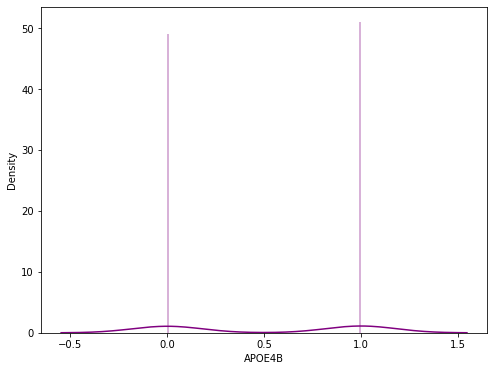

In [ ]:
print(cat_cols['APOE4B'].describe())
plt.figure(figsize=(8, 6))
sns.distplot(cat_cols['APOE4B'], color='purple', bins=100, hist_kws={'alpha': 0.3});

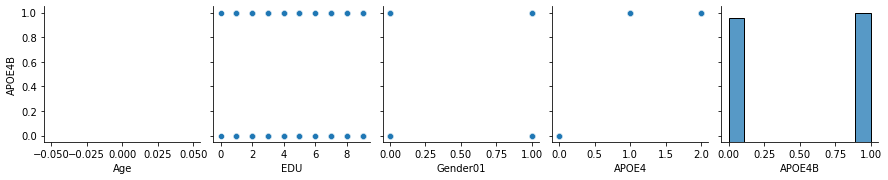

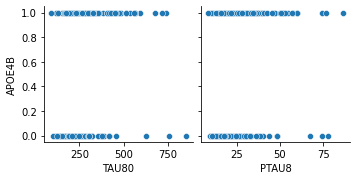

In [ ]:
for i in range(0, len(cat_cols.columns), 5):
    sns.pairplot(data=cat_cols,
                x_vars=cat_cols.columns[i:i+5],
                y_vars=['APOE4B'])

count    157.000000
mean     291.066815
std      139.263997
min       88.690000
25%      197.800000
50%      253.200000
75%      343.300000
max      851.600000
Name: TAU80, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


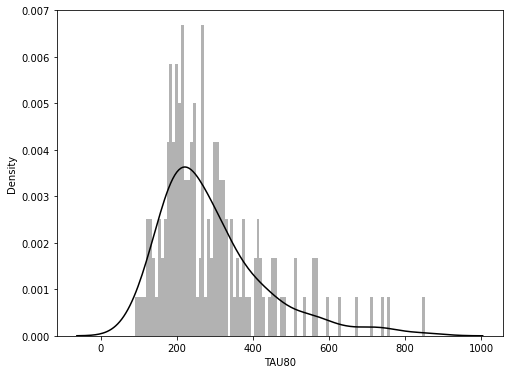

In [ ]:
print(cat_cols['TAU80'].describe())
plt.figure(figsize=(8, 6))
sns.distplot(cat_cols['TAU80'], color='Black', bins=100, hist_kws={'alpha': 0.3});

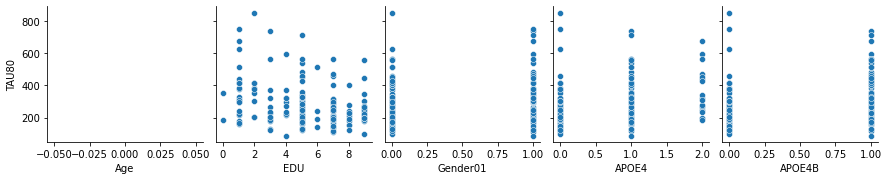

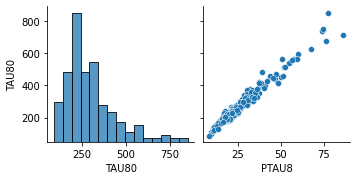

In [ ]:
for i in range(0, len(cat_cols.columns), 5):
    sns.pairplot(data=cat_cols,
                x_vars=cat_cols.columns[i:i+5],
                y_vars=['TAU80'])

count    157.000000
mean      27.952611
std       15.122800
min        8.530000
25%       17.790000
50%       24.150000
75%       33.160000
max       86.510000
Name: PTAU8, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


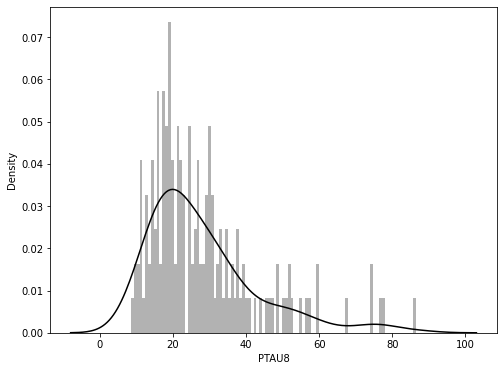

In [ ]:
print(cat_cols['PTAU8'].describe())
plt.figure(figsize=(8, 6))
sns.distplot(cat_cols['PTAU8'], color='black', bins=100, hist_kws={'alpha': 0.3});

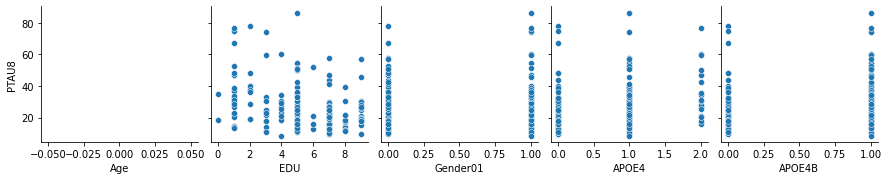

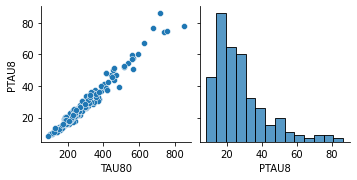

In [ ]:
for i in range(0, len(cat_cols.columns), 5):
    sns.pairplot(data=cat_cols,
                x_vars=cat_cols.columns[i:i+5],
                y_vars=['PTAU8'])

In [ ]:
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 165
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       0 non-null      float64
 1   EDU       157 non-null    int64  
 2   Gender01  157 non-null    int64  
 3   APOE4     157 non-null    float64
 4   APOE4B    157 non-null    float64
 5   TAU80     157 non-null    float64
 6   PTAU8     157 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 9.8 KB


In [ ]:
y.value_counts()

2.0    97
1.0    60
Name: ABETA12, dtype: int64

In [ ]:
count1=len(y[y==1])
count0=len(y[y==2])
print("Percentage of people have preclinical:{:.2f}%".format((count1/(len(y))*100)))
print("Percentage of people have non-preclinical:{:.2f}%".format((count0/(len(y))*100)))

Percentage of people have preclinical:38.22%
Percentage of people have non-preclinical:61.78%


### PCA

In [ ]:
np.mean(x),np.std(x)

(Gender01       0.407643
 Marry123       1.216561
 ABETA1700    982.454140
 TAU80        291.066815
 PTAU8         27.952611
                 ...    
 RD_SUMGCC      0.000821
 RD_SUMBCC      0.001055
 RD_SUMSCC      0.000775
 RD_SUMCC       0.000882
 RD_SUMFX       0.002058
 Length: 240, dtype: float64, Gender01       0.491396
 Marry123       0.469699
 ABETA1700    454.924173
 TAU80        138.819773
 PTAU8         15.074561
                 ...    
 RD_SUMGCC      0.000148
 RD_SUMBCC      0.000188
 RD_SUMSCC      0.000180
 RD_SUMCC       0.000172
 RD_SUMFX       0.000345
 Length: 240, dtype: float64)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:

pca = PCA(n_components=10)
dfx_pca = pca.fit(x)


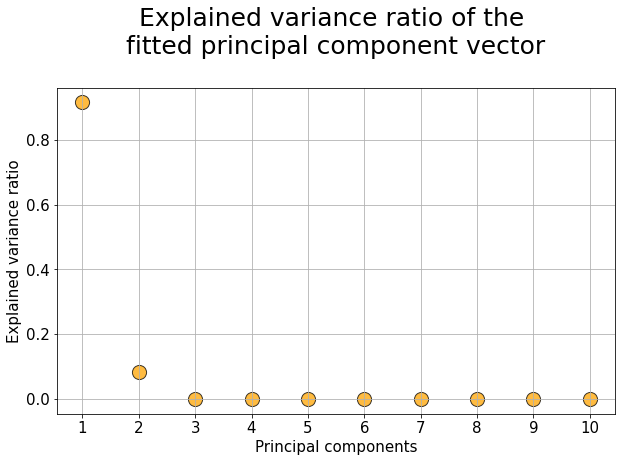

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [ ]:
dfx_trans = pca.transform(x)

In [ ]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9
0,719.307600,-15.803894,-3.119696,0.962953,1.908696,-2.044057,-0.142291,0.034773,-0.582184,0.179488
1,715.835139,51.575884,-6.035187,0.730418,4.626796,-2.049986,-0.136737,0.070517,-0.588725,0.108965
2,361.369905,32.126515,-15.956006,-1.370331,-0.453029,-1.260142,-0.228939,0.432101,-0.246164,0.918984
3,374.469954,-86.011048,-0.086243,-1.465730,0.365228,-1.784603,0.248989,0.068111,-0.651369,0.292560
4,206.823922,97.186736,-12.921808,-1.602807,-4.837441,-0.868508,0.183825,1.052365,-0.171917,0.483225
5,720.517311,-39.274944,0.140959,1.188082,1.751356,-2.132241,-0.035326,0.038295,-0.558240,0.205631
6,721.036182,-49.417445,-0.197060,3.547430,-2.704290,-1.954494,-0.088847,0.370431,-0.098888,1.048147
7,717.750453,14.604780,4.739372,-1.146350,2.811660,-2.075285,0.265124,0.099758,-0.533103,0.223941
8,721.467860,-57.791935,-2.379994,2.819207,-1.973334,-1.959634,-0.095235,0.619558,-0.420583,-0.352029
9,662.389582,-57.607459,0.210771,-0.859119,0.517050,-1.935071,0.013178,0.034117,-0.608105,0.282697


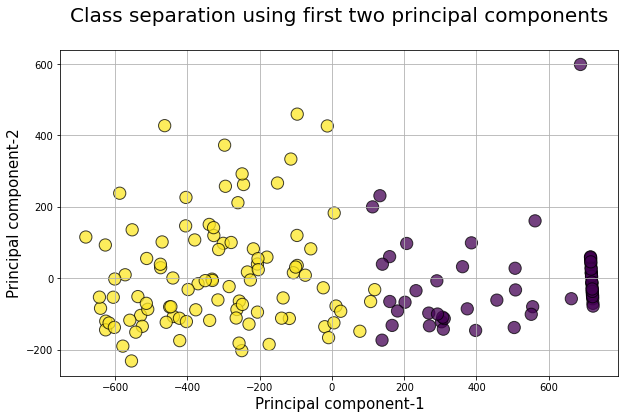

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=y,edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [ ]:
dfx_trans.shape

(157, 10)

In [ ]:
from sklearn.model_selection import train_test_split # split train and test data
y_data = y
X_data = dfx_trans
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(117, 10)
(40, 10)
(117,)
(40,)


In [ ]:
# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb

In [ ]:
Logistic=LogisticRegression(C=0.03, solver='liblinear')
Logistic.fit(X_train,y_train)
y_pred_logi = Logistic.predict(X_test)
X_train.shape

(117, 10)

In [ ]:
# Random forest
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

In [ ]:
#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,matthews_corrcoef
from sklearn import metrics

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.975,1.0,0.928571,0.928571,0.962963,0.964286,12.088852,0.945611


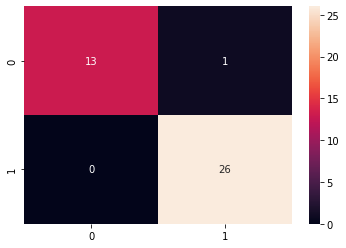

In [ ]:
CM=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc= accuracy_score(y_test, y_pred_rfe)
roc=roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)

mathew = matthews_corrcoef(y_test, y_pred_rfe)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

Comparison with other models


In [ ]:
data = {        'logistic': y_pred_logi,
                'KNN': y_pred_knn,  
                'SVC': y_pred_svc,  
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.975,1.000000,0.928571,0.928571,0.962963,0.964286,12.088852,0.945611
1,logistic,0.950,0.875000,1.000000,1.000000,0.933333,0.961538,12.088852,0.898717
2,KNN,0.975,0.933333,1.000000,1.000000,0.965517,0.980769,12.088852,0.947331
3,SVC,0.975,1.000000,0.928571,0.928571,0.962963,0.964286,12.088852,0.945611
4,CART,0.975,1.000000,0.928571,0.928571,0.962963,0.964286,12.088852,0.945611
5,GBM,0.975,1.000000,0.928571,0.928571,0.962963,0.964286,12.088852,0.945611


## With cross validation

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('Logistic Regression'   , LogisticRegression(penalty='l2')))
    basedModels.append(('K Neighbors Classifier'  , KNeighborsClassifier(9)))
    basedModels.append(('Decision Tree Classifier' , DecisionTreeClassifier()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('Random Forest Classifier1'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('Random Forest Classifier2'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 5
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [ ]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression: 0.982971 (0.020864)
K Neighbors Classifier: 0.982971 (0.020864)
Decision Tree Classifier: 0.991667 (0.016667)
SVM Linear: 0.982971 (0.020864)
SVM RBF: 0.606884 (0.067764)
GBM: 0.991667 (0.016667)
Random Forest Classifier1: 0.991667 (0.016667)
Random Forest Classifier2: 0.991667 (0.016667)


ROC/AUC curve

Precision, Recall curve

Feature importance